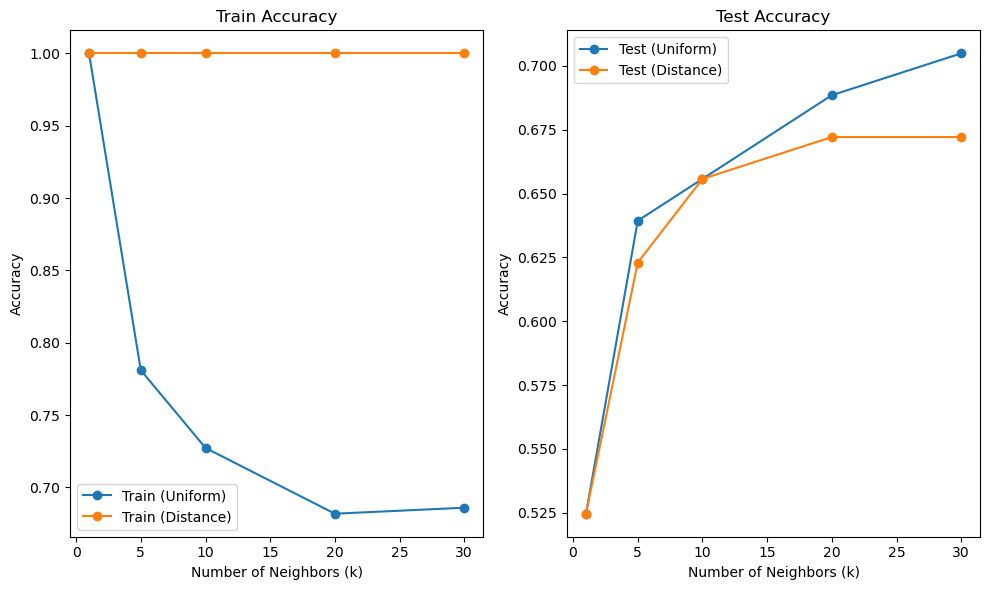

In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
# Assuming you have already downloaded the dataset and it's named 'heart-disease.csv'
data = pd.read_csv('heart-disease.csv')

# Step 2: Data preprocessing
# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Step 3: Split the dataset (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 4: Vary k and train k-NN with uniform and distance weights
neighbors = [1, 5, 10, 20, 30]
train_accuracies_uniform = []
test_accuracies_uniform = []
train_accuracies_distance = []
test_accuracies_distance = []

for k in neighbors:
    # k-NN with uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    
    # Train accuracy for uniform
    train_acc_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
    train_accuracies_uniform.append(train_acc_uniform)
    
    # Test accuracy for uniform
    test_acc_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))
    test_accuracies_uniform.append(test_acc_uniform)
    
    # k-NN with distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    
    # Train accuracy for distance
    train_acc_distance = accuracy_score(y_train, knn_distance.predict(X_train))
    train_accuracies_distance.append(train_acc_distance)
    
    # Test accuracy for distance
    test_acc_distance = accuracy_score(y_test, knn_distance.predict(X_test))
    test_accuracies_distance.append(test_acc_distance)

# Step 5: Plot the train and test accuracies
plt.figure(figsize=(10, 6))

# Train Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(neighbors, train_accuracies_uniform, label='Train (Uniform)', marker='o')
plt.plot(neighbors, train_accuracies_distance, label='Train (Distance)', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Train Accuracy')
plt.legend()

# Test Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(neighbors, test_accuracies_uniform, label='Test (Uniform)', marker='o')
plt.plot(neighbors, test_accuracies_distance, label='Test (Distance)', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
